# Insuficiencia cardiaca

## Introducción

En México las enfermedades relacionadas con la insuficiencia cardiaca son  una de la principal causa de hospitalización en mayores de 65 años y una  de las 10 primeras causas de muerte y discapacidad en el mundo.

La insuficiencia cardiaca es progresiva, incapacitante y por desgracia potencialmente mortal, ya que el 50% de quienes la padecen y tras 5 años de diagnóstico clínico, morirán. En pacientes con insuficiencia cardíaca (hospitalizados y ambulatorios), la mayoría de las muertes son debidas a causas cardiovasculares, principalmente muerte súbita y progresión de la insuficiencia cardíaca.



Para el desarrollo de este proyecto se tomo como fuente de datos un dataset del **BMC Medical Informatics and Decision Making** el cual contiene los siguientes datos:
- **age**: Edad del paciente.
- **anemia**: diagnostico si el paciente sufre o no anemia.
- **creatinine_phosphokinase**: nivel de creatinina fosfoquinasa en la sangre (isoenzima que se encuentra en el tejido cardiaco).
- **diabetes**: diagnostico si el paciente sufre diabetes o no.
- **ejection_fraction**: Porcentaje de presión sanguinea.
- **high_blood_pressure**: Diagnostico si el paciente sufre hipertension.
- **platelets**: Nivel de plaquetas del paciente.
- **serum_creatinine**: Niveles de serum creatina en el paciente.
- **serum_sodium**: Niveles de sodio del paciente.
- **sex**: sexo del paciente para masculino es 1 y para femenino es 0.
- **smoking**: Si el paciente fuma o no.
- **time**: Tiempo transcurrido en meses desde que el paciente fue al médico.
- **death_time**: Si el paciente falleció o no. 1 muere y 0 vive.

## Objetivo

El presente proyecto tiene como objetivo  identificar que variables estan relacionadas con  el fallecimiento de pacientes por  una  insuficiencia cardica, con el fin de identificar si un paciente puede fallecer o no de esta enfermedad.



In [2]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [3]:
df_heart_failure_clinical = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df_heart_failure_clinical.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df_heart_failure_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Revisando los valores nulos

In [100]:
df_heart_failure_clinical.isnull().sum()

age                               0
anaemia                           0
creatinine_phosphokinase_level    0
diabetes                          0
press_blood_level                 0
hypertension                      0
platelets_level                   0
creatina_level                    0
sodio_level                       0
sex                               0
smoking                           0
time                              0
death_event                       0
dtype: int64

Dentro del data set no se encontraron los valores nulos.

In [7]:
df_heart_failure_clinical.rename(columns= { 
        'creatinine_phosphokinase' : 'creatinine_phosphokinase_level',
        'ejection_fraction':'press_blood_level',
        'high_blood_pressure':'hypertension', 
        'platelets': 'platelets_level',
        'serum_creatinine' : 'creatina_level',
        'serum_sodium':'sodio_level',
        'DEATH_EVENT':'death_event'},inplace = True)

In [8]:
df_heart_failure_clinical['age'] = df_heart_failure_clinical['age'].astype(int)

# Análisis exploratorio descriptivo


 ### Cantidad de pacientes vivos y fallecidos
 Existe un desbalanceo encuanto a la cantidad de pacientes que vivieron y fallecieron, pues en el dataset existen más pacientes que vivieron lo que ocacionaría que al entrenar a nuestro modelo sea bueno en predecir si el paciente vive.

In [9]:
death_event = (df_heart_failure_clinical['death_event'].value_counts(normalize = True)) * 100

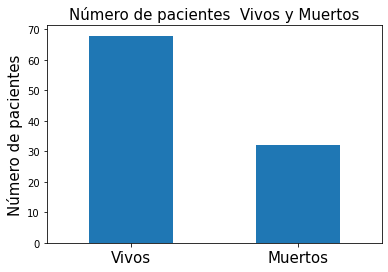

In [22]:

death_event.plot.bar(rot =0);
plt.xticks([0,1], ['Vivos', 'Muertos'],fontsize=(15));
plt.ylabel('Número de pacientes', fontsize=(15));
plt.title("Número de pacientes  Vivos y Muertos",fontsize=(15));


In [23]:
corr = df_heart_failure_clinical.corr()
# Para que nos muestre la matriz diagonal
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

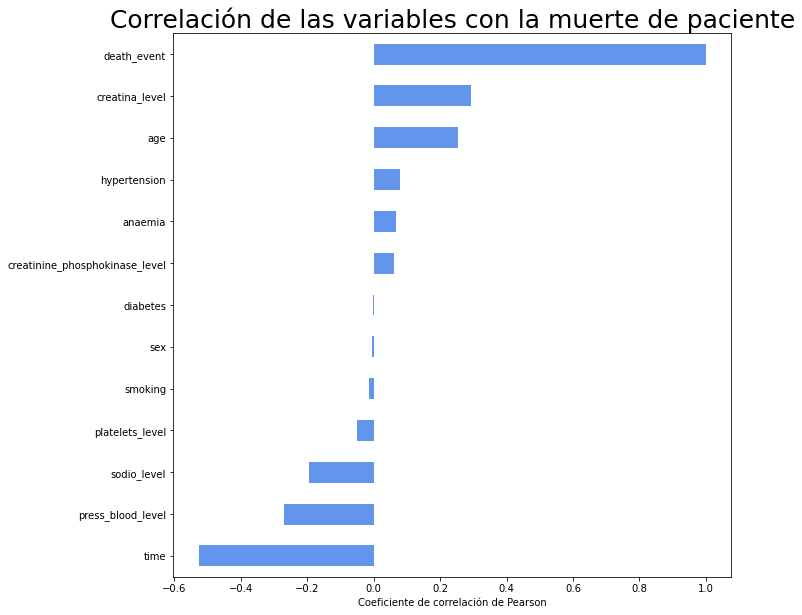

In [72]:
df_heart_failure_clinical.corrwith(df_heart_failure_clinical.death_event).sort_values().plot.barh(figsize=(10,10), color='cornflowerblue')
plt.xlabel('Coeficiente de correlación de Pearson')
plt.title('Correlación de las variables con la muerte de paciente', fontsize = 25);

## Mapa de calor

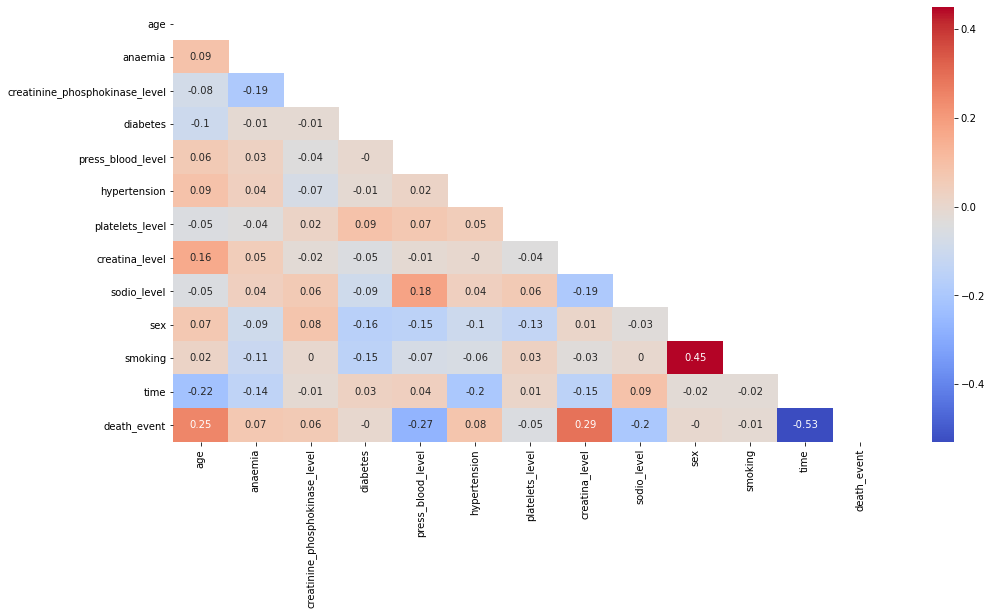

In [26]:
plt.figure(figsize=(16,8))
sb.heatmap(df_heart_failure_clinical.corr().round(decimals=2), annot= True, cmap='coolwarm', mask = mask);


## Correlación de variables

- Edad y fallecimiento del paciente.
- Edad y Niveles de creatina.
- Presión arterial y Niveles de sodio.
- Niveles de creatina y fallecimiento del paciente.
- Sexo y Fumador. 
- Hypertensión y edad
- Fallecimiento del paciente y tiempo de atención.

## Edad  y fallecimiento del paciente
Se identifico que el envejecimiento causa  cambios en el corazón y en los vasos sanguíneos, los cambios que ocurren con la edad  aumentan el riesgo de que un paciente desarrolle una enfermedad cardíaca y eventualemente fallesca.

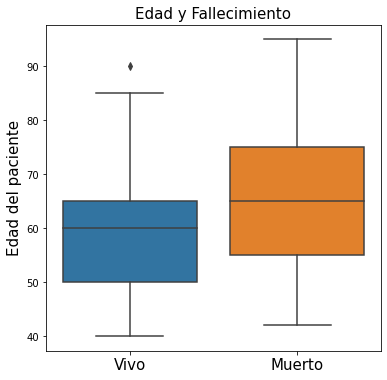

In [69]:
plt.figure(figsize=(6, 6))

plt.title("Edad y Fallecimiento",fontsize=(15))

graph = sb.boxplot(y='age', x ='death_event', data=df_heart_failure_clinical);
graph.set(xticklabels=['Vivo','Muerto']);
#graph.set(ylabel= ("Edad del paciente"),size=15)
graph.set_ylabel("Edad del paciente",size = 15)
graph.set(xlabel= (""))
graph.set_xticklabels(graph.get_xmajorticklabels(), fontsize = 15);

 ## Edad y Niveles de creatina.
 Los niveles de creatina normales para los hombres son de 0.7 a 1.3 mg/dL  y para las mujeres es de 0.6 a 1.1 mg/dL, Las mujeres con frecuencia tienen niveles de creatinina más bajos que los hombres, en el gráfico se puede observar que los pacientes con más edad tienden a tener mayores cantidades de creatina, esto se puede deber principalmente a los siguientes factores:
 
- Obstrucción de las vias urinarias
- **Problemas renales, como la insuficiencia, daño en el riñon o reducción del flujo de sangre.**
- Deshidratación
- Problemas musculares

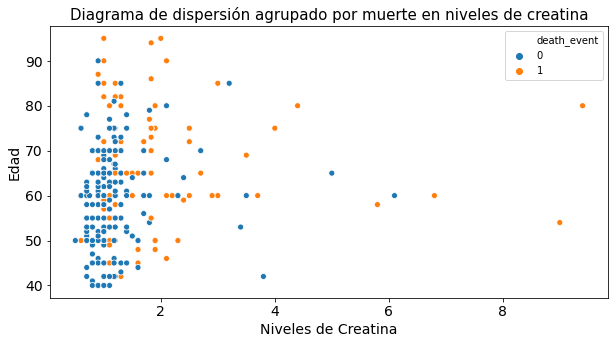

In [38]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=df_heart_failure_clinical, x =  'creatina_level', y = "age", hue = 'death_event')
plt.title('Diagrama de dispersión agrupado por muerte en niveles de creatina', fontsize = 15)
plt.ylabel('Edad', fontsize = 14)
plt.xlabel('Niveles de Creatina', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

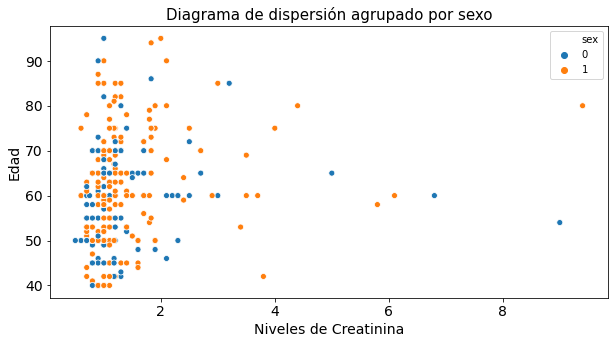

In [34]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=df_heart_failure_clinical, x =  'creatina_level', y = "age", hue = 'sex')
plt.title('Diagrama de dispersión agrupado por sexo', fontsize = 15)
plt.ylabel('Edad', fontsize = 14)
plt.xlabel('Niveles de Creatinina', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

##  Presión arterial y Niveles de sodio.
 Los pacientes tiene un nivel de sodio normal en la sangre que  oscila entre 135 y 145  sin embargo la presión arterial es muy baja esto puede indicar que la frecuencia cardíaca que los pasientes sufren de   (bradicardia), problemas de la válvula cardiaca, ataque cardíaco e insuficiencia cardíaca.

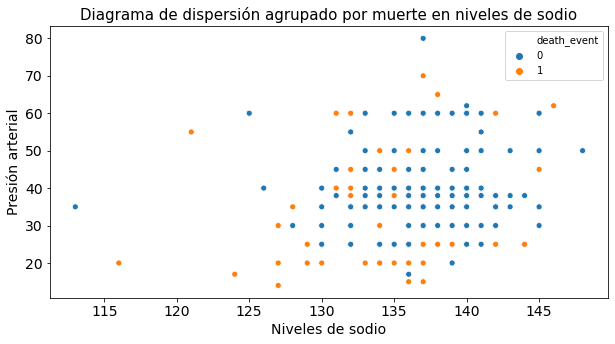

In [39]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=df_heart_failure_clinical, x =  'sodio_level', y = "press_blood_level", hue = 'death_event')
plt.title('Diagrama de dispersión agrupado por muerte en niveles de sodio', fontsize = 15)
plt.ylabel('Presión arterial', fontsize = 14)
plt.xlabel('Niveles de sodio', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

#### Niveles de sodio y fallecimiento del paciente

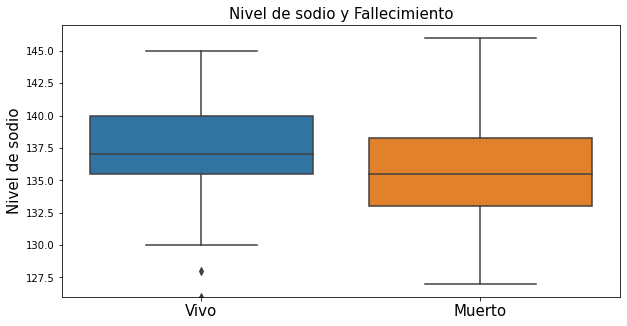

In [102]:
plt.figure(figsize=(10, 5))
plt.title("Nivel de sodio y Fallecimiento",fontsize = 15)
graph =sb.boxplot(y='sodio_level',x = 'death_event' , data = df_heart_failure_clinical );
graph.set(xticklabels=['Vivo','Muerto']);
graph.set_ylabel("Nivel de sodio",size = 15)
graph.set(xlabel= (""))
graph.set_xticklabels(graph.get_xmajorticklabels(), fontsize = 15);
plt.ylim(126,147);



#### Presión arterial del paciente

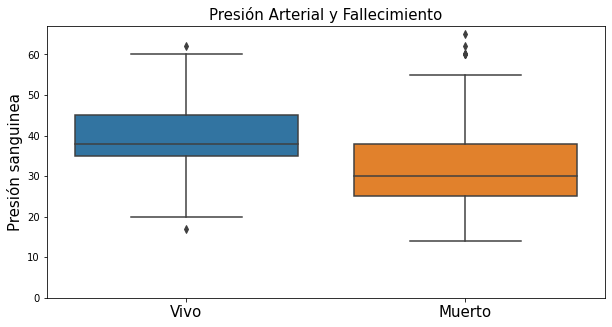

In [72]:
plt.figure(figsize=(10, 5))
plt.title("Presión Arterial y Fallecimiento", fontsize = 15)
graph = sb.boxplot(y='press_blood_level',x = 'death_event' , data = df_heart_failure_clinical );
graph.set(xticklabels=['Vivo', 'Muerto']);
plt.ylim(0,67);
graph.set_ylabel("Presión sanguinea",size = 15)
graph.set(xlabel= (""))
graph.set_xticklabels(graph.get_xmajorticklabels(), fontsize = 15);

## Niveles de creatina y fallecimiento del paciente
Teniendo en cuenta que los niveles altos de creatina impactan la mortalidad en los pacientes observamos que hay una mayor distribución de pacientes que fallecieron con  niveles arriba del 1.1 mg/dL.

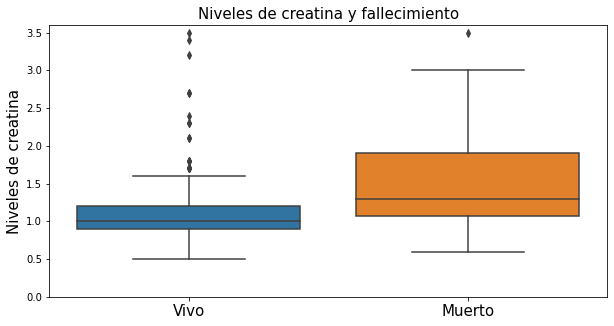

In [73]:
plt.figure(figsize=(10, 5))
plt.title("Niveles de creatina y fallecimiento",size = 15)
graph = sb.boxplot(y='creatina_level', x ='death_event', data=df_heart_failure_clinical);
graph.set(xticklabels=['Vivo','Muerto']);
graph.set_ylabel("Niveles de creatina",size = 15)
graph.set(xlabel= (""))
graph.set_xticklabels(graph.get_xmajorticklabels(), fontsize = 15);
plt.ylim(0,3.6);

## Sexo y fumador
Entre los datos se puede observar que hay mayor número de pacientes que no fuman.

In [ ]:
df_heart_failure_clinical.smoking

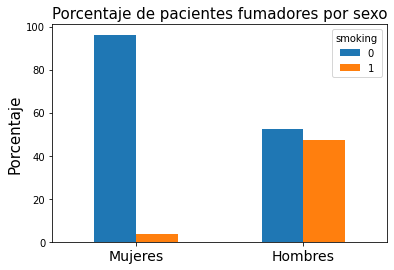

In [98]:
(df_heart_failure_clinical.groupby('sex').smoking.value_counts(normalize= True ) * 100).unstack().plot.bar(rot=0);
plt.title("Porcentaje de pacientes fumadores por sexo", fontsize=15)
plt.ylabel("Porcentaje", fontsize=15)
plt.xlabel("")
plt.xticks([0,1], ["Mujeres","Hombres"], fontsize=14);

### Fumadores y Fallecimiento
Se pudo indentificar que el fumar no es necesariamente un factor en el fallecimiento del pasiente por una insfuciencia cardica ya que la mayoría de pasientes fallecidos no fumaban.

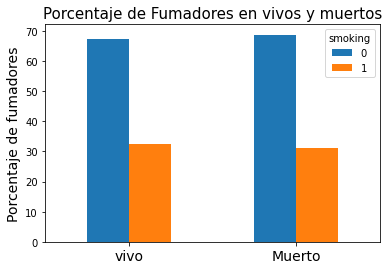

In [90]:
(df_heart_failure_clinical.groupby('death_event').smoking.value_counts(normalize= True) * 100).unstack().plot.bar(rot=0);
plt.ylabel("Porcentaje de fumadores", fontsize=14);
plt.xlabel("");
plt.title("Porcentaje de Fumadores en vivos y muertos", fontsize=15)
plt.xticks([0,1], ["vivo","Muerto"],fontsize= 14);

# Tiempo transcurrido y Fallecimiento del paciente



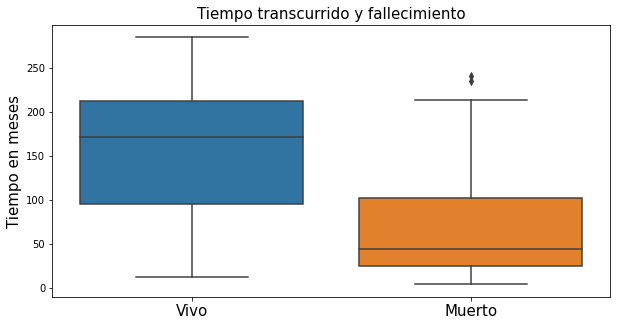

In [75]:
plt.figure(figsize=(10, 5))
plt.title("Tiempo transcurrido y fallecimiento", fontsize=(15))
graph = sb.boxplot(y='time', x ='death_event', data=df_heart_failure_clinical);
graph.set(xticklabels=['Vivo','Muerto']);
graph.set_ylabel("Tiempo en meses",size = 15)
graph.set(xlabel= (""))
graph.set_xticklabels(graph.get_xmajorticklabels(), fontsize = 15);


# Modelo de predicción

In [91]:
# Bibliotecas para realizar regresión logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import roc_auc_score, classification_report, log_loss
import scikitplot as skplt

In [75]:
df_heart_failure_clinical.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase_level', 'diabetes',
       'press_blood_level', 'hypertension', 'platelets_level',
       'creatina_level', 'sodio_level', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [81]:
x_names = ['age', 'anaemia', 'creatinine_phosphokinase_level', 'diabetes',
       'press_blood_level', 'hypertension', 'platelets_level',
       'creatina_level', 'sodio_level', 'sex', 'smoking', 'time']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(df_heart_failure_clinical[x_names],
                                                    df_heart_failure_clinical.death_event, 
                                                    test_size=0.2, random_state = 69)

# Estandarización de variables numéricas
Para la regresión lógistica es necesario realizar una estandarización de las variables numéricas.

In [94]:
## TODO : revisar el renombrado de variables
categoricas =['diabetes', 'hypertension','sex','smoking','anaemia']
numericas =['age', 'creatinine_phosphokinase_level','press_blood_level', 'platelets_level',
       'creatina_level', 'sodio_level','time']

In [102]:
df_cat = x_train[categoricas]
df_num = x_train[numericas]

In [103]:
x_train_std = (df_num - df_num.mean())/df_num.std()
x_train_std = pd.concat([x_train_std, df_cat], axis=1)

In [104]:
x_train_std.head()

,age,creatinine_phosphokinase_level,press_blood_level,platelets_level,creatina_level,sodio_level,time,diabetes,hypertension,sex,smoking,anaemia
234,-0.623928,-0.005098,0.631001,0.402355,-0.272929,0.079329,0.997308,0,0,1,1,1
279,-0.450231,-0.505718,0.034243,1.894616,-0.087669,-0.151887,1.474925,1,0,0,0,0
220,1.113041,-0.005098,-1.500276,-0.023267,0.403269,-0.614318,0.855314,0,0,1,0,0
133,0.244556,-0.396144,1.909767,0.300145,-0.087669,1.929055,-0.319365,0,1,1,1,0
183,1.286738,-0.490639,0.034243,-0.425544,1.023890,-0.614318,0.390606,0,1,1,0,0


In [105]:
df_cat = x_test[categoricas]
df_num = x_test[numericas]

x_test_std = (df_num - df_num.mean())/df_num.std()
x_test_std = pd.concat([x_test_std, df_cat], axis=1)

In [106]:
x_test_std.head()

,age,creatinine_phosphokinase_level,press_blood_level,platelets_level,creatina_level,sodio_level,time,diabetes,hypertension,sex,smoking,anaemia
186,-1.023436,0.024044,0.821614,-1.033981,-0.942464,-0.522829,0.606248,0,0,0,0,0
25,1.267839,-0.472867,-0.165969,-1.074813,0.606792,1.568488,-1.290133,1,0,1,1,0
15,1.420590,-0.208382,0.821614,-2.116036,-0.108249,-0.104566,-1.417407,0,0,1,0,1
228,0.122201,-0.578203,-1.235851,-0.176503,4.301172,-1.359357,1.051707,0,0,0,0,0
216,0.504080,0.733917,0.821614,1.058674,-0.584944,0.941093,0.911705,0,1,0,0,0


# Regresión Lógistica

In [111]:
# Entrenamiento del modelo 
model = LogisticRegression()
model.fit(x_train_std, y_train)

LogisticRegression()

In [112]:
# Haciendo las predicciones
y_hat = model.predict(x_test_std)

In [113]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.79      0.75      0.77        20

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



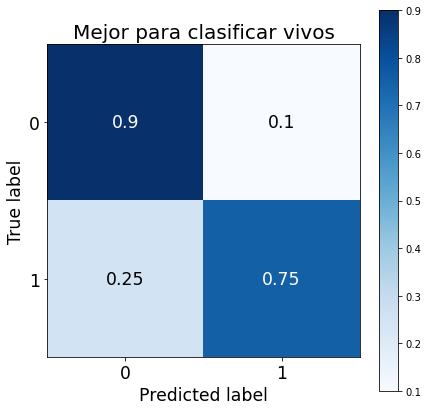

In [150]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat, normalize = True, figsize=(7,7),text_fontsize='xx-large')
plt.title('Mejor para clasificar vivos', fontsize = 20);

In [115]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat))

Área bajo la curva ROC:  0.825


In [148]:
print('Perdida lógaritmica:',"% 1.3f" % log_loss(y_test,y_hat))

Perdida lógaritmica:  5.181


# Arbol de desición

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [121]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [123]:
y_hat_tree = model_tree.predict(x_test)

In [124]:
print(classification_report(y_test,y_hat_tree))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.70      0.80      0.74        20

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60



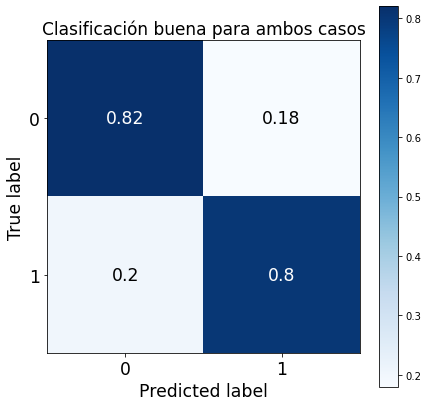

In [155]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat_tree, normalize = True, figsize=(7,7),text_fontsize='xx-large');
plt.title('Clasificación buena para ambos casos', fontsize = 17);


plt.figure(figsize=(30,0))
plot_tree(model_tree, filled=True, feature_names = x_names)
plt.show()

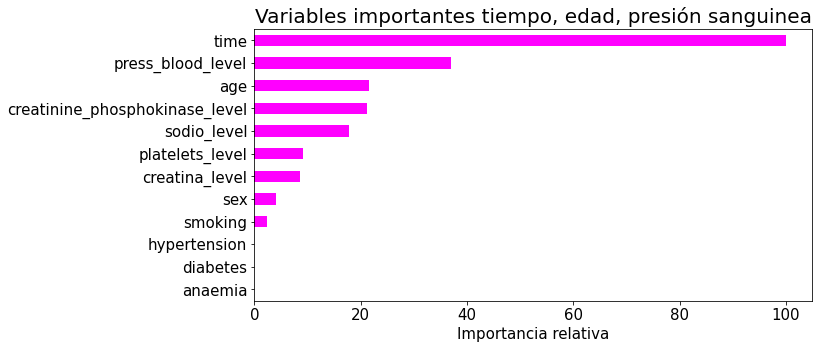

In [142]:
#DF de variables mas importantes
f_imp = pd.DataFrame(model_tree.feature_importances_,
                     index=x_names, columns=['imp'])
#calculo de importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)
#plot de importancia de variables
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(10,5),
                                                              title='Importancia de Variables',color='magenta');
plt.title("Variables importantes tiempo, edad, presión sanguinea", fontsize=20)
plt.xlabel('Importancia relativa', fontsize= 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15);

In [144]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat_tree))

Área bajo la curva ROC:  0.812


In [147]:
print('Perdida lógaritmica:',"% 1.3f" % log_loss(y_test,y_hat_tree))

Perdida lógaritmica:  6.332


# Conclusión:


Se  encontraron que todas las variables especificadas en el análisis exploratorio descriptivo:
- Edad.
-  Niveles de creatina.
- Presión arterial. 
- tiempo de atención.

 jugaron un papel muy importante en nuestros algoritmos de aprendizaje a la hora  de definir si un paciente puede fallecer o no. 

